<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

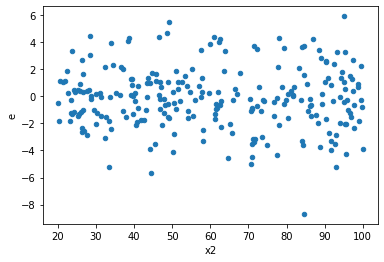

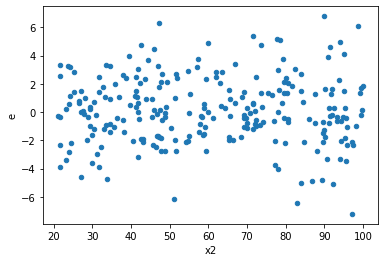

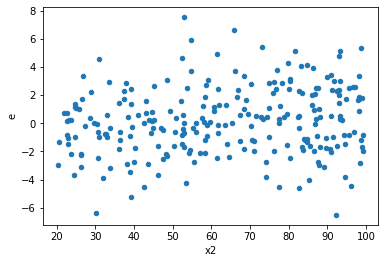

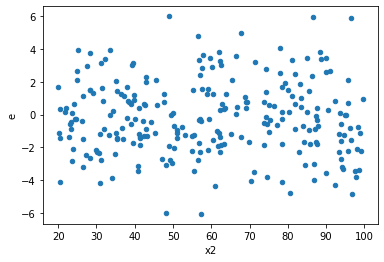

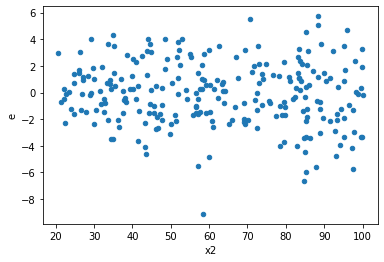

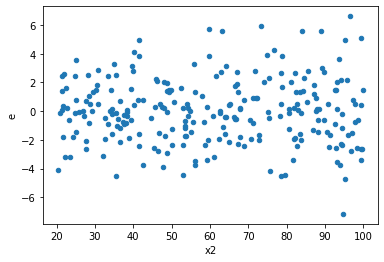

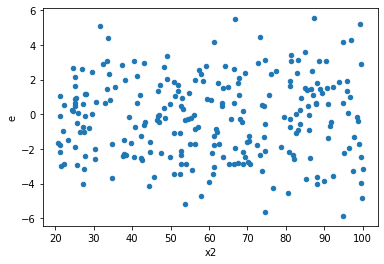

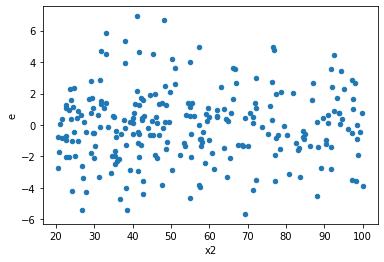

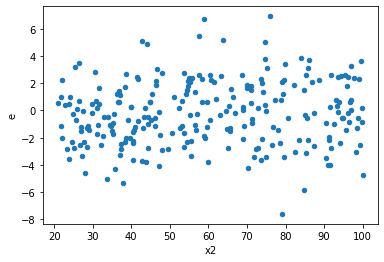

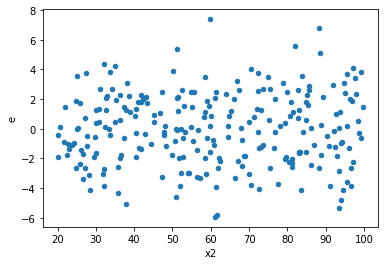

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,494.71259102904577,517.9302510835968,5.100129804423152,5.3394871245731625,1.0469316133762763,0.821776297364119,0.5891118513179405,0.4108881486820595,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,499.6670555335029,545.3987528708894,5.1512067580773495,5.622667555369994,1.091524339719692,0.6671379812571998,0.6664310093714001,0.3335689906285999,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,407.5680267214735,537.202451557176,4.2017322342419945,5.538169603682227,1.3180681906735854,0.17563285650347304,0.9121835717482635,0.08781642825173652,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,587.1588545014483,592.7736644206726,6.05318406702524,6.111068705367759,1.009562676056366,0.962715456205673,0.5186422718971635,0.4813577281028365,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,460.4525823490944,616.8263194030582,4.746933838650458,6.359034220650084,1.339608774167778,0.15170127930193122,0.9241493603490344,0.07585063965096561,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,459.0965201478755,591.0296545448876,4.7329538159574795,6.093089222112244,1.2873755922926977,0.21530927193568483,0.8923453640321576,0.10765463596784242,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,428.2484610243962,473.25931064750495,4.414932587880373,4.8789619654381955,1.10510452160281,0.6235831572807271,0.6882084213596364,0.31179157864036355,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,392.7397458314559,577.3265605211143,4.048863359087174,5.951820211557879,1.469997795356505,0.059225103797995615,0.9703874481010022,0.029612551898997808,Reject005=1 : Homoscedasticity
9.0,97.0,97.0,429.78335824409214,685.1877063295512,4.430756270557651,7.06379078690259,1.5942630006171719,0.02256810882535687,0.9887159455873216,0.011284054412678435,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,494.71259102904577,517.9302510835968,5.100129804423152,5.3394871245731625,1.0469316133762763,0.821776297364119,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,510.64878397466157,490.72830575016354,5.264420453347027,5.059054698455294,0.9609898645612235,0.8450491259052426,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,499.6670555335029,545.3987528708894,5.1512067580773495,5.622667555369994,1.091524339719692,0.6671379812571998,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,407.5680267214735,537.202451557176,4.2017322342419945,5.538169603682227,1.3180681906735854,0.17563285650347304,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,587.1588545014483,592.7736644206726,6.05318406702524,6.111068705367759,1.009562676056366,0.962715456205673,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,460.4525823490944,616.8263194030582,4.746933838650458,6.359034220650084,1.339608774167778,0.15170127930193122,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,459.0965201478755,591.0296545448876,4.7329538159574795,6.093089222112244,1.2873755922926977,0.21530927193568483,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,428.2484610243962,473.25931064750495,4.414932587880373,4.8789619654381955,1.10510452160281,0.6235831572807271,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,392.7397458314559,577.3265605211143,4.048863359087174,5.951820211557879,1.469997795356505,0.059225103797995615,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      819
Reject005=0 : Heteroscedasticity    181
Name: Result_test, dtype: int64